In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from tqdm import tqdm
import os
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
def sigmoid(x,w,b):
    z=np.dot(x,w.T)+b
    
    return 1 / (1 + np.exp(-z))

In [6]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)#create all weights to zero 
    b = 0 #intercept equal to 0
    return w,b

In [7]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


#Grader function - 1

In [8]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

In [9]:

#Sigmoid function
def sigmoid_h(z):
  
  return 1 / (1 + np.exp(-z))



# Grader function - 2

In [ ]:
def grader_sigmoid(z):
  val=sigmoid_h(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [10]:
def logloss(y_true,y_pred):
  loss=[]
  for i in range(len(y_true)):
    l = ((-y_true[i]) * np.log10(y_pred[i]) - (1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss.append(l) 
  return (sum(loss)/len(y_true))

#Grader function - 3

In [ ]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

In [11]:
def gradient_dw(x,y,w,b,alpha,N):
  
  y_pred=sigmoid(x,w,b)
  dw=-x*(y-y_pred)+(alpha/N)*w
  
  return dw

# Grader function - 4

In [ ]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

In [12]:
 def gradient_db(x,y,w,b):
   z=np.dot(x,w.T)+b
   y_pred=sigmoid_h(z)
   db=y-y_pred
   return db

# Grader function - 5

In [ ]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

#Implementing logistic regression

In [13]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    w,b=initialize_weights(X_train[0])
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
    train_loss=[]
    test_loss=[]
    for epoch in range(epochs):
        # for every data point(X_train,y_train)
        for i in range(1,N):
           #compute gradient w.r.to w (call the gradient_dw() function)
           dw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
           #compute gradient w.r.to b (call the gradient_db() function)
           db=gradient_db(X_train[i],y_train[i],w,b)
           #update w, b
           w=w-alpha*dw
           b=b+alpha*db
        # predict the output of x_train[for all data points in X_train] using w,b
        y_pred=sigmoid(X_train,w,b)
        #compute the loss between predicted and actual values (call the loss function)
        train_l=logloss(y_train,y_pred)
        # store all the train loss values in a list
        train_loss.append(train_l)
        # predict the output of x_test[for all data points in X_test] using w,b
        y_test_pred=sigmoid(X_test,w,b)
        #compute the loss between predicted and actual values (call the loss function)
        test_l=logloss(y_test,y_test_pred)
        # store all the test loss values in a list
        test_loss.append(test_l)
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    return w,b,train_loss,test_loss

In [15]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [16]:
print('weights',w)
print('coff',b)

weights [-0.42979255  0.19303304 -0.14846902  0.33808668 -0.22128675  0.56994172
 -0.44517427 -0.08990408  0.22182779  0.17382907  0.19874699 -0.00058362
 -0.08133489  0.33908619  0.02298678]
coff -0.892241112828588


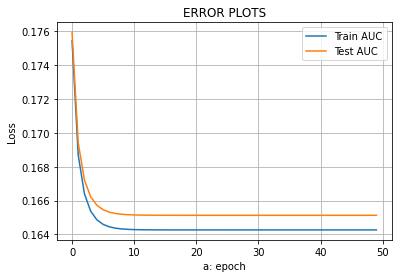

In [18]:
import matplotlib.pyplot as plt
a=[i for i in range(50)]
plt.plot(a, train_loss, label='Train AUC')
plt.plot(a, test_loss, label='Test AUC')
#plt.scatter(a, train_loss, label='Train AUC points')
#plt.scatter(a, test_loss, label='Test AUC points')
plt.legend()
plt.xlabel("a: epoch")
plt.ylabel("Loss")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [20]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [21]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

# <font color='red'>Goal of assignment</font>

In [22]:
w-clf.coef_, b-clf.intercept_

(array([[-0.00642564,  0.00755739,  0.00012134, -0.00335739, -0.01310005,
          0.00977594,  0.00725055,  0.00418405,  0.01255459, -0.00701219,
          0.00169508, -0.00480278, -0.00173119,  0.00055817,  0.00031958]]),
 array([-0.03910282]))